"""
Case Study-1: Predict whether or not an applicant will be able to repay a loan.

Client: An international consumer finance provider with operations in 10 countries dedicated to provide lines of credit (loans) to the unbanked population. 

Client Need: What sort of models the machine learning community can develop to help them in this task.

Problem Type: Supervised Classification.
"""

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load and explore training data
train_df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/Case Studies/case_study_1/application_train.csv')
print('Training data shape: ', train_df.shape)
train_df.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


"""
The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).
"""

In [3]:
# load and explore testing data
test_df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/Case Studies/case_study_1/application_test.csv')
print('Testing data shape: ', test_df.shape)
test_df.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


"""
Exploratory Data Analysis (EDA) 
"""

In [4]:
# Examine the Distribution of the Target Column
train_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

"""
0 means the loan was repaid on time
1 indicating the client had payment difficulties
"""

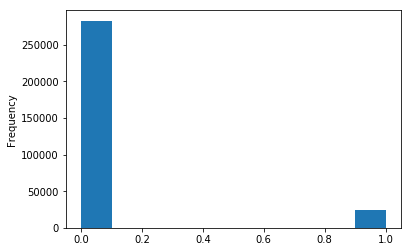

In [6]:
train_df['TARGET'].astype(int).plot.hist()

"""
From above information, we see this is an imbalanced class problem. 
There are far more loans that were repaid on time than loans that were not repaid.
"""

In [7]:
# check number and percentage of missing values in each column
def missing_values_table(df):
        mis_val = df.isnull().sum() # Total missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df) # Percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # Make a table with the results
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) # Rename the columns
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# Missing values statistics
missing_values = missing_values_table(train_df)
missing_values.head()

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


"""
We will have to fill in these missing values (known as imputation) or use a machine learning model which can handle this by itself. We will do this later; let's explore more.
"""

In [10]:
 # data types of each type of column
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

"""
We will need to find a way to deal with these categorical variables since machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM).

If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option to handle categorical features.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

"""

In [12]:
le = LabelEncoder()
le_count = 0

for col in train_df:
    if train_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_df[col])
            # Transform both training and testing data
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])    
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
# one-hot encoding of categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
print('Training Features shape: ', train_df.shape)
print('Testing Features shape: ', test_df.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


"""
One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes.

"""

In [14]:
# seperate target variable
train_labels = train_df['TARGET']
# combine the training and testing data, keep only columns present in both dataframes
train_df, test_df = train_df.align(test_df, join = 'inner', axis = 1)
# add the target back in
train_df['TARGET'] = train_labels

print('Training Features shape: ', train_df.shape)
print('Testing Features shape: ', test_df.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [16]:
# check statistics of some columns which you think may affect laon repayment
train_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

"""
Here max days of employment is 365243 which means 1000 years! That is impossible.
let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.
"""

In [18]:
anomalous_clients = train_df[train_df['DAYS_EMPLOYED'] == 365243]
non_anomalous_clients = train_df[train_df['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anomalous_clients['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalous_clients['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalous_clients))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


"""
It turns out that the anomalies clients have a lower rate of default.

We will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.
"""

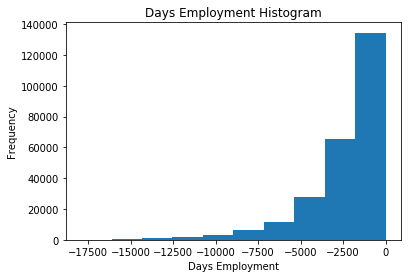

In [19]:
# Create an anomalous flag column
train_df['DAYS_EMPLOYED_ANOM'] = train_df["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

"""
Let's repeat above step in the testing data also.
"""

In [20]:
test_df['DAYS_EMPLOYED_ANOM'] = test_df["DAYS_EMPLOYED"] == 365243
test_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_df["DAYS_EMPLOYED_ANOM"].sum(), len(test_df)))

There are 9274 anomalies in the test data out of 48744 entries


"""
Let's find possible relationships within the data using pearson corelation coefficient
Some interpretations of the absolute value of the correlation coefficent are:

1. .00-.19 “very weak”
2. .20-.39 “weak”
3. .40-.59 “moderate”
4. .60-.79 “strong”
5. .80-1.0 “very strong”

"""

In [21]:
# Find correlations with the target and sort
correlations = train_df.corr()['TARGET'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

Most Positive Correlations:
 REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64


In [22]:
# Find the correlation of the positive days since birth and target
train_df['DAYS_BIRTH'] = abs(train_df['DAYS_BIRTH'])
train_df['DAYS_BIRTH'].corr(train_df['TARGET'])

-0.07823930830982712

"""
It means as the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.
"""

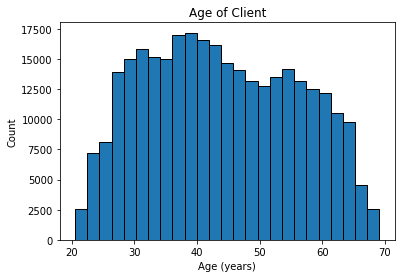

In [23]:
# Plot the distribution of ages in years
plt.hist(train_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')
plt.show()

"""
The above distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. 
"""

"""
Feature Engineering by-
1. Creating Polynomial features - In this method, we make features that are powers of existing features as well as interaction terms between existing features
2. Creating Domain knowledge features - We can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan
"""

In [24]:
# Make a new dataframe for polynomial features
poly_features = train_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures                                 
poly_transformer = PolynomialFeatures(degree = 3)

In [25]:
# Train the polynomial features
poly_transformer.fit(poly_features)
# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [26]:
# get the names
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [27]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head())
print(poly_corrs.tail())

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


"""
When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.
"""

In [28]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_df['SK_ID_CURR']
app_train_poly = train_df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_df['SK_ID_CURR']
app_test_poly = test_df.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [29]:
# Domain Knowledge Features
app_train_domain = train_df.copy()
app_test_domain = test_df.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

#repeat for test
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [30]:
# get a baseline
from sklearn.preprocessing import MinMaxScaler, Imputer
# Drop the target from the training data
if 'TARGET' in train_df:
    train = train_df.drop(columns = ['TARGET'])
else:
    train = train_df.copy()    
# Feature names
features = list(train.columns)
# Copy of the testing data
test = test_df.copy()
# Median imputation of missing values
imputer = Imputer(strategy = 'median')
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
# Fit on the training data
imputer.fit(train)
# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test_df)
# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [31]:
from sklearn.linear_model import LogisticRegression
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)
# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

"""
Now that the model has been trained, we can use it to make predictions.

We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. 
This returns an m x 2 array where m is the number of observations. 
The first column is the probability of the target being 0 and 
the second column is the probability of the target being 1 
(so for a single row, the two columns must sum to 1). 
We want the probability the loan is not repaid, so we will select the second column.

"""

In [32]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

"""
The predictions must be in the format shown in the sample_submission.csv file, where there are only two columns: SK_ID_CURR and TARGET. 
We will create a dataframe in this format from the test set and the predictions called submit.
"""

In [34]:
# Submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


"""
The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

If you check teh accuracy of this model you will et around 67.1%.
"""

In [35]:
# Save the submission to a csv file
submit.to_csv('E:/pg/bpb/BPB-Publications/Datasets/Case Studies/case_study_1/log_reg_baseline.csv', index = False)

"""
Let's Improved Model to Random Forest
"""

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [37]:
# Train on the training data
random_forest.fit(train, train_labels)
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [38]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
# Save the submission dataframe
submit.to_csv('E:/pg/bpb/BPB-Publications/Datasets/Case Studies/case_study_1/random_forest_baseline.csv', index = False)

"""
When you check the accuracy of this model , it will be around 67.8%.

Let's make Predictions using Engineered Features
The only way to see if the Polynomial Features and Domain knowledge improved the model is to train a test a model on these features! We can then compare the submission performance to that for the model without these features to gauge the effect of our feature engineering.
"""

In [39]:
poly_features_names = list(app_train_poly.columns)
# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [40]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [42]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('E:/pg/bpb/BPB-Publications/Datasets/Case Studies/case_study_1/random_forest_baseline_engineered.csv', index = False)

"""
If you check the accuracy of this model you will get the same 67.8% accuracy.
Given these results, it does not appear that our feature construction helped in this case.

Now we can test the domain features we made by hand.
"""

In [43]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')
domain_features_names = list(app_train_domain.columns)
# Impute the domainnomial features
imputer = Imputer(strategy = 'median')
domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)
# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))
domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
# Train on the training data
random_forest_domain.fit(domain_features, train_labels)
# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})
# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [45]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
# Save the submission dataframe
submit.to_csv('E:/pg/bpb/BPB-Publications/Datasets/Case Studies/case_study_1/random_forest_baseline_domain.csv', index = False)

"""
Let's check which variables are the most relevant.
We can look at the feature importances of the random forest. 
"""

In [46]:
def plot_feature_importances(df):
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (8, 4))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    return df

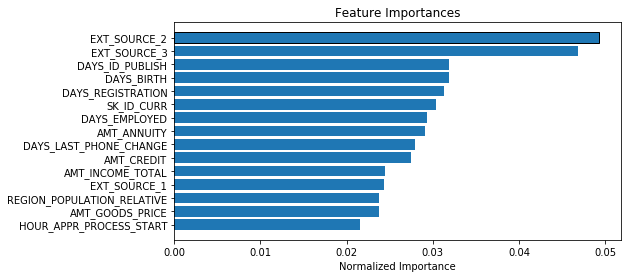

In [47]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

"""
Feature importances are not the most sophisticated method to interpret a model or perform dimensionality reduction, but they let us start to understand what factors our model takes into account when it makes predictions.
"""